# Bitcoin Price Prediction using Machine Learning

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Bitcoin_prices.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


In [37]:
df.shape

(3125, 7)

In [38]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3125 non-null   datetime64[ns]
 1   Open       3125 non-null   float64       
 2   High       3125 non-null   float64       
 3   Low        3125 non-null   float64       
 4   Close      3125 non-null   float64       
 5   Adj Close  3125 non-null   float64       
 6   Volume     3125 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 171.0 KB


In [40]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3125,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03
mean,2018-12-27 23:59:59.999999744,13186.265595,13515.583806,12823.837626,13193.565130,13193.565130,1.660684e+10
min,2014-09-18 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2016-11-07 00:00:00,715.554993,736.452026,705.260010,716.411011,716.411011,1.123540e+08
50%,2018-12-28 00:00:00,7361.459961,7526.419922,7220.991211,7361.660156,7361.660156,9.029176e+09
75%,2021-02-16 00:00:00,19053.203125,19348.416016,18553.296875,19067.634766,19067.634766,2.811148e+10
max,2023-04-08 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16047.435766,16456.130052,15578.340888,16044.562412,16044.562412,1.978543e+10


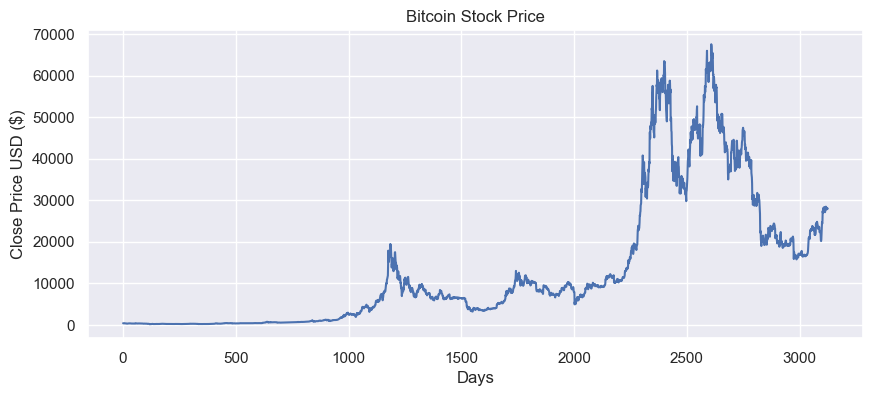

In [41]:
sns.set ()
plt.figure(figsize=(10, 4))
plt.title("Bitcoin Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show ()

In [42]:
df_pred = df[['Close']]
df_pred.head()

,Close
0,424.440002
1,394.795990
2,408.903992
3,398.821014
4,402.152008


In [43]:
futureDays = 25

df_pred["Prediction"] = df_pred[["Close"]].shift(-futureDays)  # Create a new target column with the “X” units/days shifted up
df_pred.head()

,Close,Prediction
0,424.440002,390.414001
1,394.795990,400.869995
2,408.903992,394.773010
3,398.821014,382.556000
4,402.152008,383.757996


In [45]:
x = np.array(df_pred.drop(columns="Prediction"))[:-futureDays]
print(x)

[[  424.440002]
 [  394.79599 ]
 [  408.903992]
 ...
 [22163.949219]
 [24197.533203]
 [24746.074219]]


In [46]:
y = np.array(df_pred["Prediction"])[:-futureDays]
print(y)

[  390.414001   400.869995   394.77301  ... 28044.140625 27925.859375
 28032.1875  ]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

tree = DecisionTreeRegressor().fit(X_train, y_train)

linear = LinearRegression().fit(X_train, y_train)

In [48]:
xfuture = df_pred.drop(columns="Prediction")[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[24641.277344]
 [24327.642578]
 [24829.148438]
 [24436.353516]
 [24188.84375 ]
 [23947.492188]
 [23198.126953]
 [23175.375   ]
 [23561.212891]
 [23522.871094]
 [23147.353516]
 [23646.550781]
 [23475.466797]
 [22362.679688]
 [22353.349609]
 [22435.513672]
 [22429.757813]
 [22219.769531]
 [21718.080078]
 [20363.021484]
 [20187.244141]
 [20632.410156]
 [22163.949219]
 [24197.533203]
 [24746.074219]]


In [52]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

print('#'*100)

linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Decision Tree prediction = [24375.960938 25052.789063 27423.929688 19290.324219 28038.675781
 27767.236328 22370.449219 27307.4375   28333.972656 28333.972656
 27494.707031 27994.330078 27139.888672 27268.130859 28348.441406
 28033.5625   28478.484375 20632.410156 28199.308594 27790.220703
 28168.089844 28177.984375 28044.140625 27925.859375 28032.1875  ]
####################################################################################################
Linear regression Prediction = [24461.34161097 24158.22029341 24642.91501965 24263.28709828
 24024.07418405 23790.81304275 23066.56751264 23044.57823492
 23417.48233409 23380.42580438 23017.4960678  23499.95958617
 23334.61056155 22259.125535   22250.10821247 22329.51802839
 22323.95511333 22121.00591377 21636.13374881 20326.49849498
 20156.61343891 20586.8569056  22067.0567718  24032.4723552
 24562.62555736]


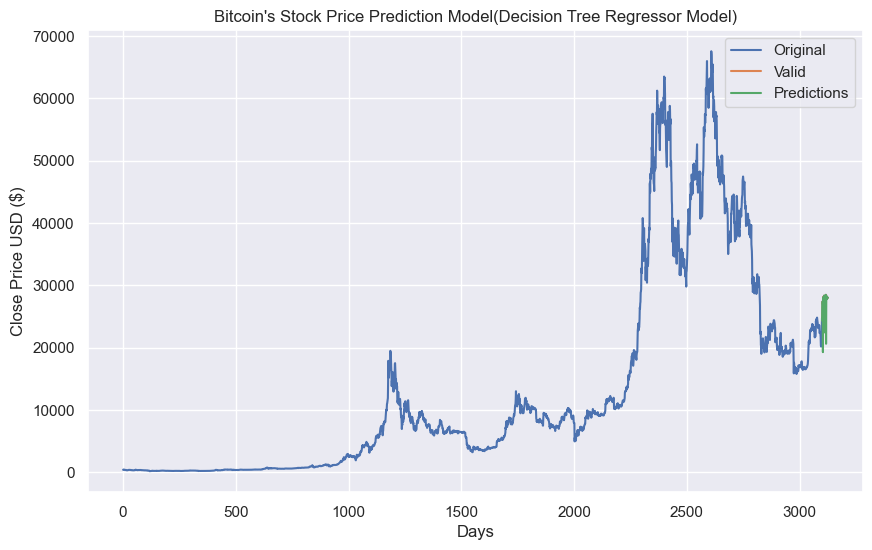

In [56]:
predictions = treePrediction
valid = df_pred[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Bitcoin's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df_pred["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show ()

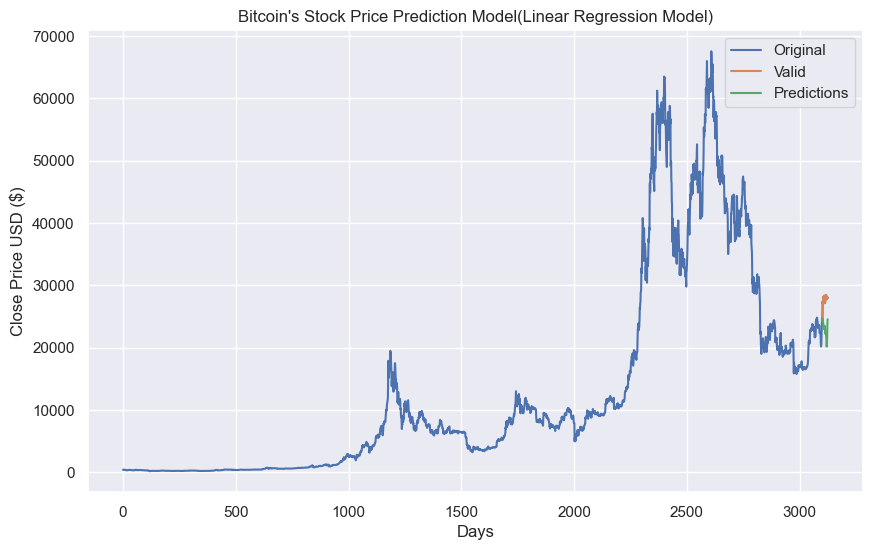

In [60]:
predictions = linearPrediction
valid = df_pred[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Bitcoin's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df_pred["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show ()